## Regressão binária

In [5]:
import numpy as np
import matplotlib.pyplot as plt

## Classificação binária

In [39]:
class BinaryLogisticalRegression:
    
    # Construtor
    def __init__(self, x, y, addOnes = True):
        if addOnes:
            self.x = np.c_[np.ones(x.shape[0]), x]
        else:
            self.x = x
        self.y = y
        self.w = np.zeros(self.x.shape[1]).reshape(-1,1)
        self.MSE = 0.0
    
    # Getters
    def getX(self):
        return self.x
    
    def getY(self):
        return self.y
    
    def getW(self):
        return self.w
    
    def getMSE(self):
        return self.MSE
    
    # Setters
    def setX(self, x, addOnes = True):
        if addOnes:
            x = np.c_[np.ones(x.shape[0]), x]
        self.x = x
        self.w = np.zeros(self.x.shape[1]).reshape(-1,1)
    
    def setY(self, y):
        self.y = y
    
    # Métodos
    def sigmoid(self, x):
        return 1/(1 + np.exp(-x))
    
    def trainGD(self, alpha = 0.1, max_iterations = 100):
    
        n = len(self.y)
        yhat = np.zeros(n).reshape(-1,1)
        e = np.zeros(n).reshape(-1,1)
                 
        for t in range(max_iterations):
            yhat = self.sigmoid(self.x @ self.w)
            e = self.y - yhat
            self.w[0] = self.w[0] + (alpha/n * e.sum())
            for column in range(1, len(self.w)):
                self.w[column] = self.w[column] + alpha/n * ((e * self.x[:,[column]]).sum())
                    
        self.MSE = ((e ** 2).sum())/(2*n)
    
    def test(self):
        return self.y - (self.x @ self.w)
    
    def predict(self, x, addOnes = True):
        if addOnes:
            x = np.c_[np.ones(x.shape[0]), x]
        return np.sign(x @ self.w)

[[-0.2075314 ]
 [ 1.52105197]
 [-1.46893804]]


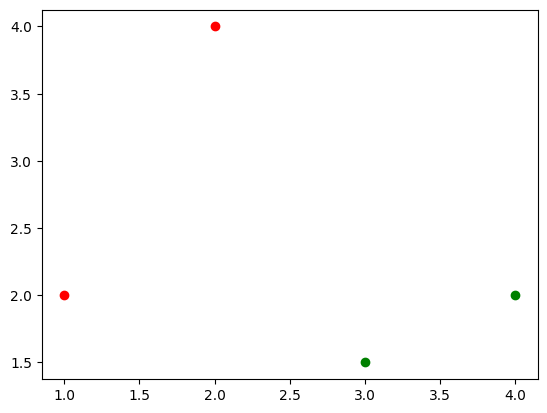

In [40]:
x = np.array([[1,   2], 
              [2,   4], 
              [3, 1.5], 
              [4,   2]])

y = np.array([0, 0, 1, 1]).reshape(-1,1)

regression = BinaryLogisticalRegression(x, y)
regression.trainGD(max_iterations = 100)
regression.test()
ypredict = regression.predict(x)

print(regression.getW())


for i in range(x.shape[0]):
    if ypredict[i] == -1:
        plt.plot(x[i,0], x[i,1], 'ro')
    else:
        plt.plot(x[i,0], x[i,1], 'go')
plt.show()

## Classificação multiclasse

In [177]:
class MulticlassLogisticalRegression:
    
    # Construtor
    def __init__(self, x, y, addOnes = True):
        if addOnes:
            self.x = np.c_[np.ones(x.shape[0]), x]
        else:
            self.x = x
        self.y = y
        self.w = np.zeros((self.x.shape[1], y.shape[1]))
        self.MSE = 0.0
    
    # Getters
    def getX(self):
        return self.x
    
    def getY(self):
        return self.y
    
    def getW(self):
        return self.w
    
    def getMSE(self):
        return self.MSE
    
    # Setters
    def setXY(self, x, y, addOnes = True):
        if addOnes:
            x = np.c_[np.ones(x.shape[0]), x]
        self.x = x
        self.y = y
        self.w = np.zeros((self.x.shape[1], y.shape[1]))
    
    # Métodos
    def softmax(self, w, x):
        numerator = np.exp(x @ w)
        denominator = np.sum(np.exp(x @ w), axis=1).reshape(-1,1)
        return numerator/denominator
    
    def trainGD(self, alpha = 0.1, max_iterations = 100):
    
        n = self.y.shape[0]
        yhat = np.zeros(self.y.shape)
        e = np.zeros(self.y.shape)
                 
        for t in range(max_iterations):
            yhat = self.softmax(self.w, self.x)
            e = self.y - yhat
            self.w = self.w + (alpha/n * (self.x.T @ e))
                            
        self.MSE = ((e ** 2).sum())/(2*n)
    
    def test(self):
        return self.y - (self.x @ self.w)
    
    def predict(self, x, addOnes = True):
        if addOnes:
            x = np.c_[np.ones(x.shape[0]), x]
        probabilities = self.softmax(self.w, x)
        max_indexes = np.argmax(probabilities, axis=1)
        prediction = np.zeros(probabilities.shape)
        prediction[np.arange(len(max_indexes)), max_indexes] = 1
        return prediction

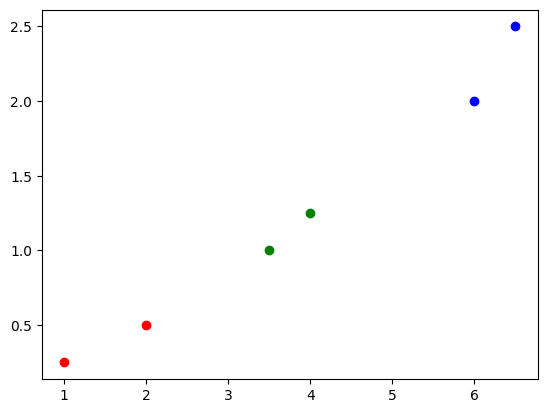

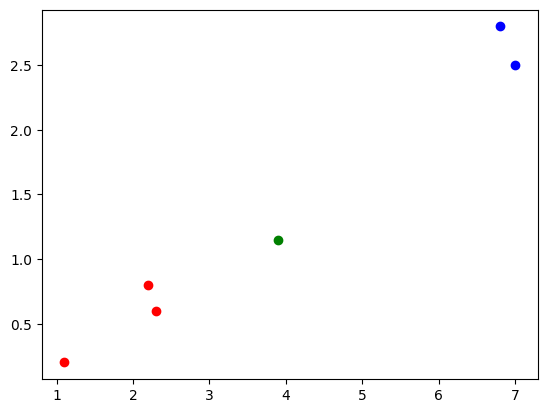

In [182]:
def getMaxIndex(y):
    max_index = 0
    max_value = y[0]
    for clss in range(1, len(y)):
        if y[clss] > max_value:
            max_value = y[clss]
            max_index = clss
    return max_index

x = np.array([[1.0, 0.25], 
              [2.0,  0.5], 
              [3.5,  1.0], 
              [4.0, 1.25],
              [6.0,  2.0],
              [6.5,  2.5]])

y = np.array([[1, 0, 0], 
              [1, 0, 0], 
              [0, 1, 0], 
              [0, 1, 0],
              [0, 0, 1], 
              [0, 0, 1]])

x2 = np.array([[1.1, 0.2], 
              [2.3,  0.6], 
              [2.2,  0.8], 
              [3.9, 1.15],
              [7.0,  2.5],
              [6.8,  2.8]])

regression = MulticlassLogisticalRegression(x, y)
regression.trainGD(max_iterations = 1000)
regression.test()
ypredict = regression.predict(x2)

for i in range(x.shape[0]):
    max_index = getMaxIndex(y[i])
    if max_index == 0:
        plt.plot(x[i,0], x[i,1], 'ro')
    elif max_index == 1:
        plt.plot(x[i,0], x[i,1], 'go')
    else:
        plt.plot(x[i,0], x[i,1], 'bo')
plt.show()

for i in range(x2.shape[0]):
    max_index = getMaxIndex(ypredict[i])
    if max_index == 0:
        plt.plot(x2[i,0], x2[i,1], 'ro')
    elif max_index == 1:
        plt.plot(x2[i,0], x2[i,1], 'go')
    else:
        plt.plot(x2[i,0], x2[i,1], 'bo')
plt.show()

# Classificadores estatísticos
## Naive Bayes Gaussiano

In [85]:
class NaiveBayesGaussiano:
    
    # Construtor 
    def __init__(self, x, y):
        self.classes = np.eye(y.shape[1])
        self.n_per_class = np.zeros((y.shape[1], 1))
        self.class_priors = np.zeros((y.shape[1], 1)) # Probabilidade de cada classe
        self.means = np.zeros((self.classes.shape[1], x.shape[1]))
        self.variances = np.zeros((self.classes.shape[1], x.shape[1]))
        
        # Calcula n_per_class
        for line in y:
            for i in range(0, len(line)):
                if line[i] == 1:
                    self.n_per_class[i] += 1
                    break
        
        # Calcula class_priors
        for i in range(0, len(self.class_priors)):
            self.class_priors[i] = self.n_per_class[i]/self.n_per_class.sum()
        
        # Calcula a média de cada atributo para cada classe
        for i in range(0, y.shape[0]):
            for c in range(self.classes.shape[0]):
                if np.array_equal(y[i], self.classes[c]):
                    self.means[c] += x[i]
                    break      
        for clss in range(0, y.shape[1]):
            self.means[clss, :] = self.means[clss, :]/self.n_per_class[clss]
    
        # Calcula a variância de cada feature
        for clss in range(self.classes.shape[0]):
            for feature in range(x.shape[1]):
                self.variances[clss, feature] = np.sum((x[y[:, clss] == 1, feature] - self.means[clss, feature])**2)/(self.n_per_class[clss] - 1)
    
    def predict(self, x):
        prob = np.zeros((self.classes.shape[0], 1))
        for clss in range(self.classes.shape[0]):
            prob[clss] = np.log(self.class_priors[clss])
            prob[clss] -= 0.5 * np.sum(np.log(2 * np.pi * self.variances[clss, :]))
            prob[clss] -= 0.5 * np.sum(((x - self.means[clss, :])**2)/self.variances[clss, :])
        print(prob)
        return self.classes[np.argmax(prob)]

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[[0.33333333]
 [0.33333333]
 [0.33333333]]
[[1.5   0.375]
 [3.75  1.125]
 [6.25  2.25 ]]
[[0.5     0.03125]
 [0.125   0.03125]
 [0.125   0.125  ]]


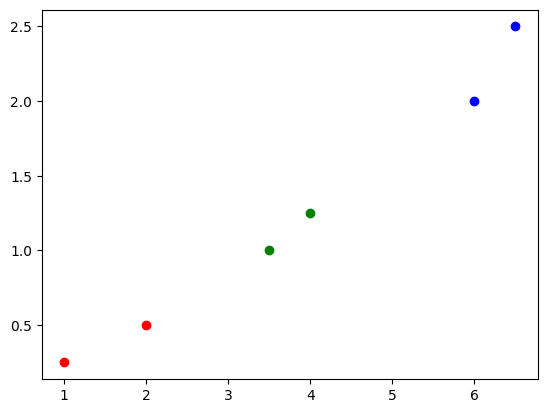

[[  -1.50704781]
 [ -41.94390063]
 [-123.75704781]]
[[ -1.37744781]
 [-18.38550063]
 [-84.67864781]]
[[ -5.35704781]
 [ -4.66390063]
 [-52.10704781]]
[[-13.30714781]
 [ -0.64430063]
 [-27.53744781]]
[[-37.11704781]
 [-10.02390063]
 [ -8.79704781]]
[[-141.35704781]
 [ -98.66390063]
 [  -5.35704781]]


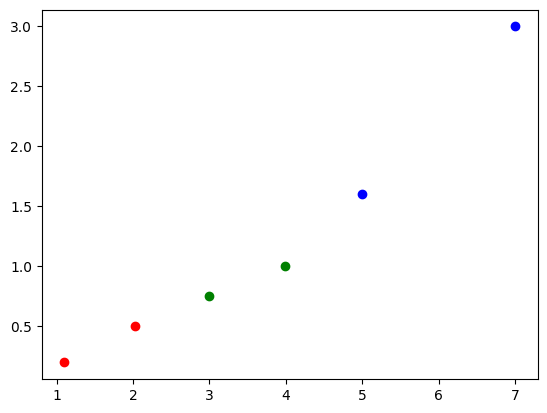

In [86]:
def getMaxIndex(y):
    max_index = 0
    max_value = y[0]
    for clss in range(1, len(y)):
        if y[clss] > max_value:
            max_value = y[clss]
            max_index = clss
    return max_index

x = np.array([[1.0, 0.25], 
              [2.0,  0.5], 
              [3.5,  1.0], 
              [4.0, 1.25],
              [6.0,  2.0],
              [6.5,  2.5]])

y = np.array([[1, 0, 0], 
              [1, 0, 0], 
              [0, 1, 0], 
              [0, 1, 0],
              [0, 0, 1], 
              [0, 0, 1]])

x_test = np.array([[ 1.1,  0.2],
                   [2.02,  0.5],
                   [ 3.0, 0.75],
                   [3.99,  1.0],
                   [ 5.0,  1.6],
                   [ 7.0,  3.0]])

y_predict = np.zeros((x_test.shape[0], y.shape[1]))

naive = NaiveBayesGaussiano(x, y)

print(naive.classes)
print(naive.class_priors)
print(naive.means)
print(naive.variances)

for i in range(x.shape[0]):
    max_index = getMaxIndex(y[i])
    if max_index == 0:
        plt.plot(x[i,0], x[i,1], 'ro')
    elif max_index == 1:
        plt.plot(x[i,0], x[i,1], 'go')
    else:
        plt.plot(x[i,0], x[i,1], 'bo')

plt.show()
        
for i in range(x_test.shape[0]):
    y_predict[i] = naive.predict(x_test[i])
    max_index = getMaxIndex(y_predict[i])
    if max_index == 0:
        plt.plot(x_test[i,0], x_test[i,1], 'ro')
    elif max_index == 1:
        plt.plot(x_test[i,0], x_test[i,1], 'go')
    else:
        plt.plot(x_test[i,0], x_test[i,1], 'bo')
    
plt.show()